# Lecture 6

Statistical Rethinking Winter 2022 lecture 6. The slide numbers are in reference to [this link](https://speakerdeck.com/rmcelreath/statistical-rethinking-2022-lecture-06).

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

In [3]:
def standardize(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

# Slide 71 and 72


In [4]:
def f(n=100, bXZ=1, bZY=1):
    X = stats.norm.rvs(size=n)
    u = stats.norm.rvs(size=n)
    Z = stats.norm.rvs(loc=bXZ * X + u, size=n)
    Y = stats.norm.rvs(loc=bZY * Z + u, size=n)

    # using statsmodels to get coefficient
    bX = sm.OLS(Y, X).fit().params[0]
    bXZ = sm.OLS(Y, np.concatenate([X.reshape(100, 1), Z.reshape(100, 1)], axis=1)).fit().params[0]

    return bX, bXZ

`mcreplicate` is an R rethinking function. The next code block may not be a perfect translation of the code example but I think it matches the spirit of it.

In [5]:
bX_coefs = list()
bXZ_coefs = list()
for i in range(10000):
    bX, bXZ = f()
    bX_coefs.append(bX)
    bXZ_coefs.append(bXZ)

az.summary(np.array(bX_coefs))

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.996,0.249,0.612,1.408,0.002,0.002,10016.0,9883.0,NaN


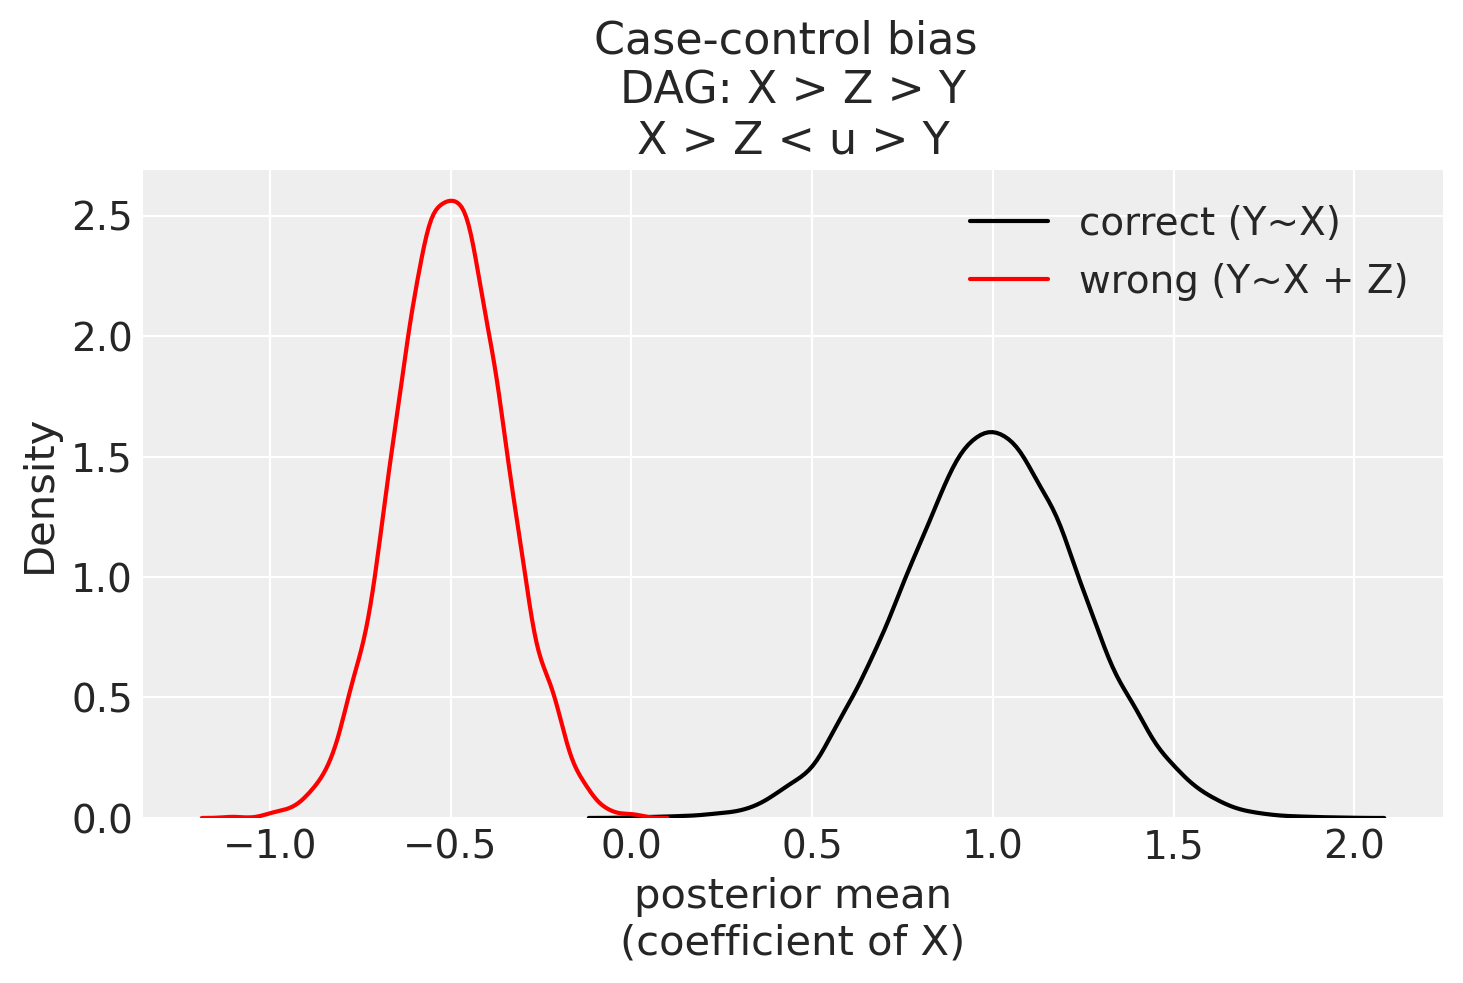

In [6]:
f, ax0 = plt.subplots()
sns.kdeplot(bX_coefs, color="k", label="correct (Y~X)", ax=ax0)
sns.kdeplot(bXZ_coefs, color="r", label="wrong (Y~X + Z)", ax=ax0)
ax0.set(
    xlabel="posterior mean\n(coefficient of X)",
    title="Case-control bias \nDAG: X > Z > Y\nX > Z < u > Y",
)
ax0.legend()

# Slide 73


In [7]:
# this block needs to be re-run before executing the next block
def f(n=100, bXZ=1, bZY=1):
    X = stats.norm.rvs(size=n)
    u = stats.norm.rvs(size=n)
    Z = stats.norm.rvs(loc=bXZ * X + u, size=n)
    Y = stats.norm.rvs(loc=bZY * Z + u, size=n)

    # using statsmodels to get coefficient
    bX = sm.OLS(Y, X).fit().params[0]
    bXZ = sm.OLS(Y, np.concatenate([X.reshape(100, 1), Z.reshape(100, 1)], axis=1)).fit().params[0]

    return bX, bXZ

In [8]:
bX_coefs = list()
bXZ_coefs = list()
for i in range(10000):
    bX, bXZ = f(bZY=0)
    bX_coefs.append(bX)
    bXZ_coefs.append(bXZ)

az.summary(np.array(bX_coefs))

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.0,0.142,-0.214,0.237,0.001,0.001,9985.0,8821.0,NaN


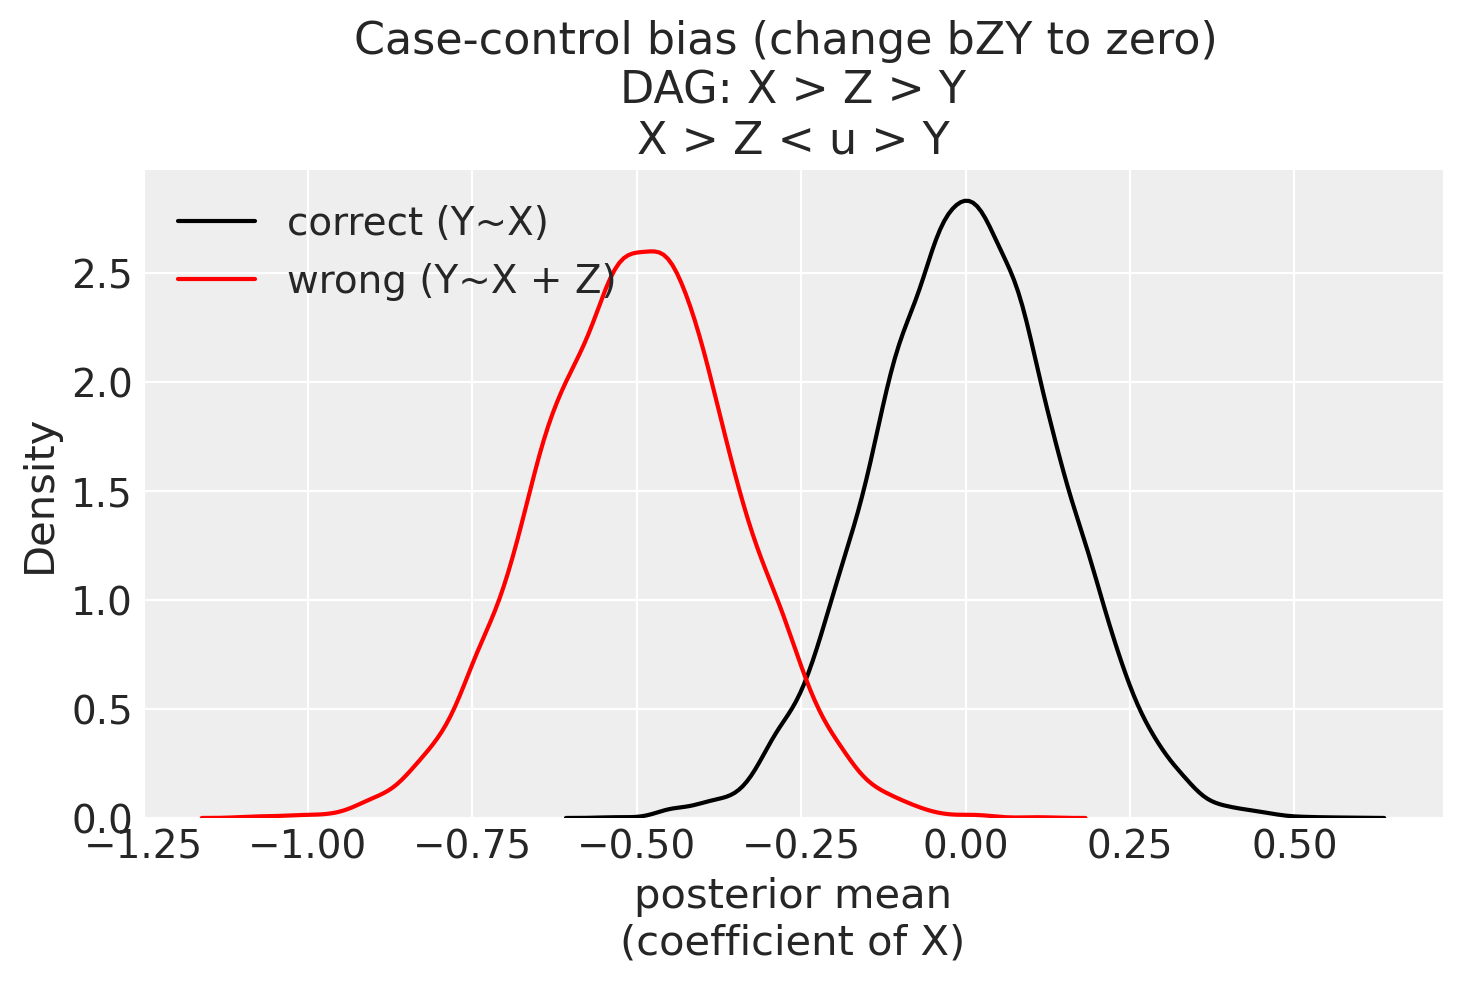

In [9]:
f, ax0 = plt.subplots()
sns.kdeplot(bX_coefs, color="k", label="correct (Y~X)", ax=ax0)
sns.kdeplot(bXZ_coefs, color="r", label="wrong (Y~X + Z)", ax=ax0)
ax0.set(
    xlabel="posterior mean\n(coefficient of X)",
    title="Case-control bias (change bZY to zero) \nDAG: X > Z > Y\nX > Z < u > Y",
)
ax0.legend()

# Slide 81

In [10]:
def f(n=100, bXY=1, bYZ=1):
    X = stats.norm.rvs(size=n)
    Y = stats.norm.rvs(loc=bXY * X, size=n)
    Z = stats.norm.rvs(loc=bYZ * Y, size=n)

    # using statsmodels to get coefficient
    bX = sm.OLS(Y, X).fit().params[0]
    bXZ = sm.OLS(Y, np.concatenate([X.reshape(100, 1), Z.reshape(100, 1)], axis=1)).fit().params[0]

    return bX, bXZ

`mcreplicate` is an R rethinking function. The next code block may not be a perfect translation of the code example but I think it matches the spirit of it.

In [11]:
bX_coefs = list()
bXZ_coefs = list()
for i in range(10000):
    bX, bXZ = f()
    bX_coefs.append(bX)
    bXZ_coefs.append(bXZ)

az.summary(np.array(bX_coefs))

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,1.0,0.102,0.832,1.157,0.001,0.001,9703.0,9695.0,NaN


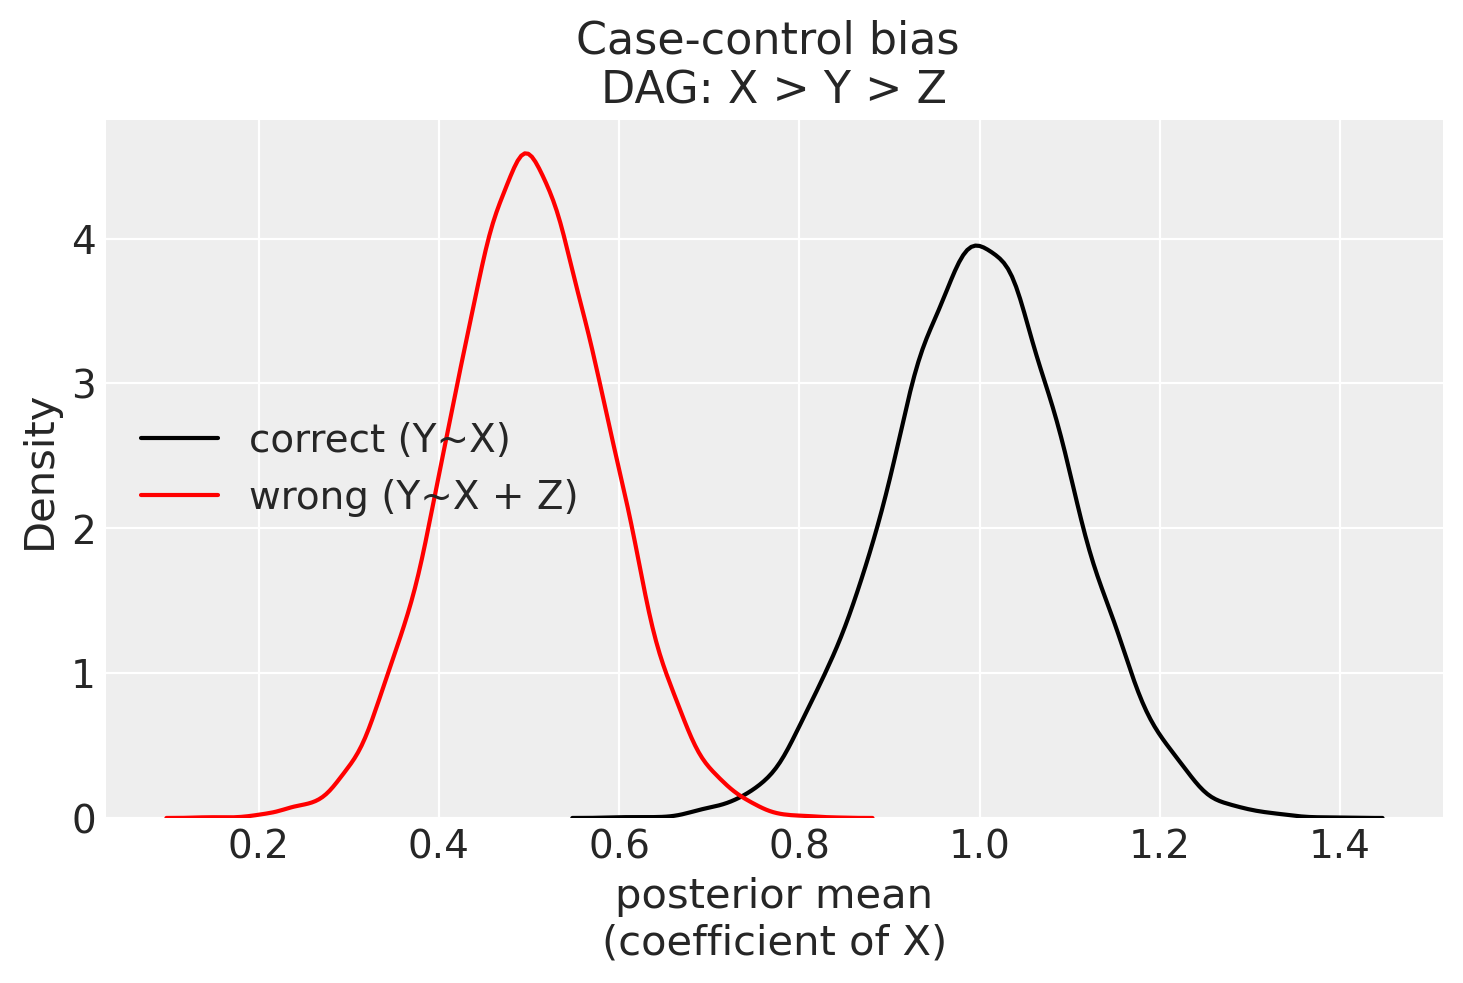

In [12]:
f, ax0 = plt.subplots()
sns.kdeplot(bX_coefs, color="k", label="correct (Y~X)", ax=ax0)
sns.kdeplot(bXZ_coefs, color="r", label="wrong (Y~X + Z)", ax=ax0)
ax0.set(xlabel="posterior mean\n(coefficient of X)", title="Case-control bias \nDAG: X > Y > Z")
ax0.legend()

# Slide 83

In [13]:
def f(n=100, bZX=1, bXY=1):
    Z = stats.norm.rvs(size=n)
    X = stats.norm.rvs(loc=bZX * Z, size=n)
    Y = stats.norm.rvs(loc=bXY * X, size=n)

    # using statsmodels to get coefficient
    bX = sm.OLS(Y, X).fit().params[0]
    bXZ = sm.OLS(Y, np.concatenate([X.reshape(100, 1), Z.reshape(100, 1)], axis=1)).fit().params[0]

    return bX, bXZ

`mcreplicate` is an R rethinking function. The next code block may not be a perfect translation of the code example but I think it matches the spirit of it.

In [14]:
bX_coefs = list()
bXZ_coefs = list()
for i in range(10000):
    bX, bXZ = f()
    bX_coefs.append(bX)
    bXZ_coefs.append(bXZ)

az.summary(np.array(bX_coefs))

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,1.0,0.072,0.886,1.114,0.001,0.001,9921.0,9678.0,NaN


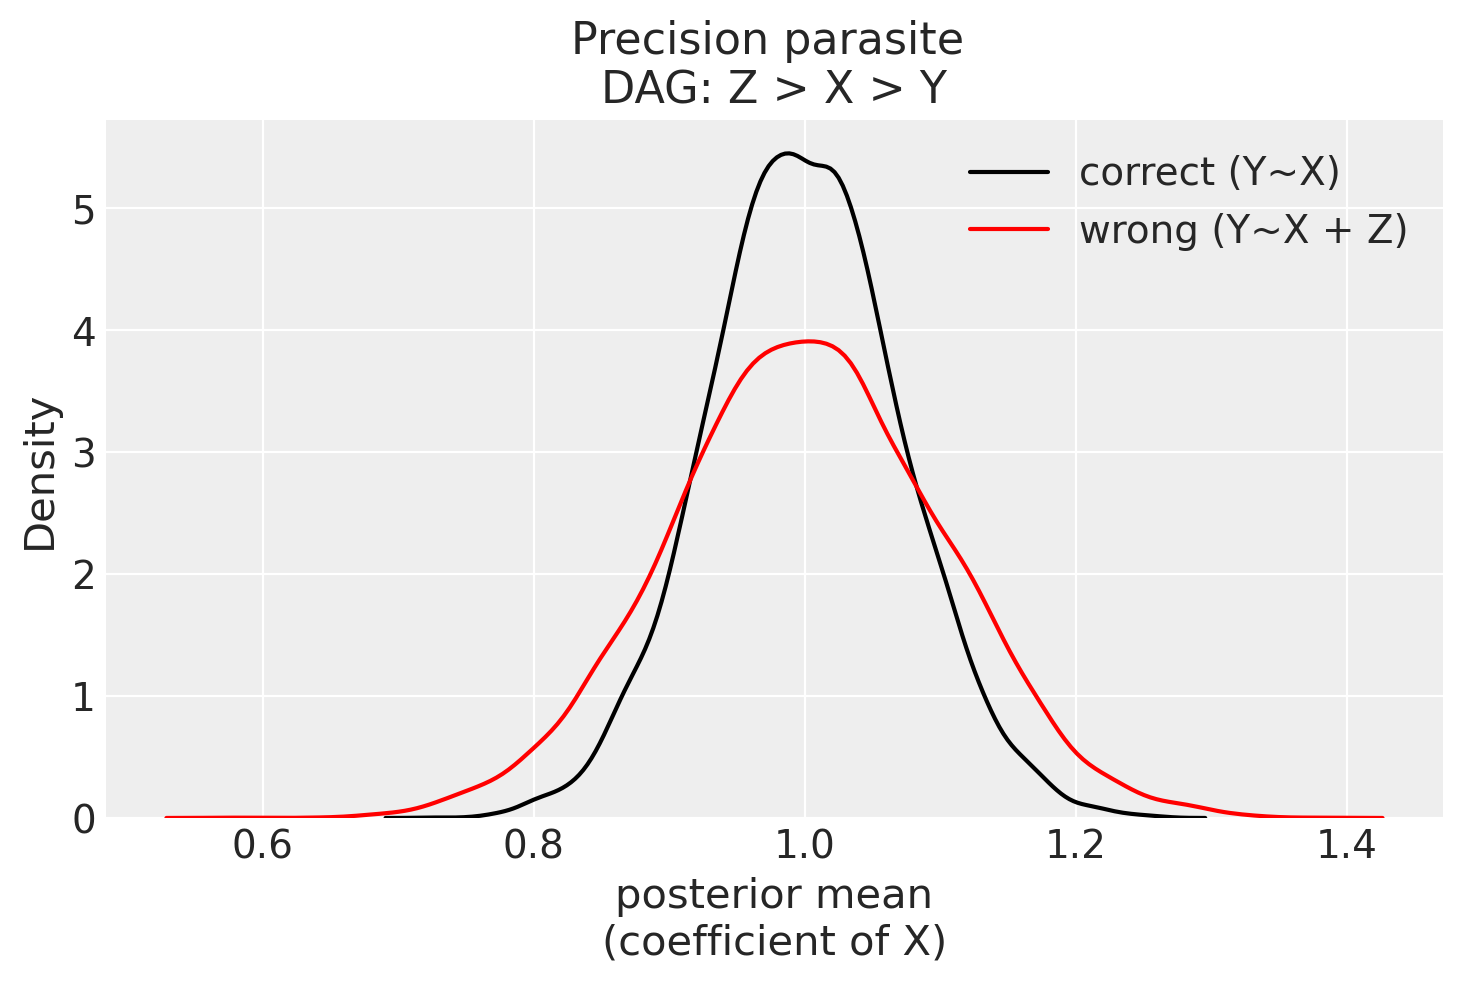

In [15]:
f, ax0 = plt.subplots()
sns.kdeplot(bX_coefs, color="k", label="correct (Y~X)", ax=ax0)
sns.kdeplot(bXZ_coefs, color="r", label="wrong (Y~X + Z)", ax=ax0)
ax0.set(xlabel="posterior mean\n(coefficient of X)", title="Precision parasite \nDAG: Z > X > Y")
ax0.legend()

# Slide 85

In [16]:
def f(n=100, bZX=1, bXY=1):
    Z = stats.norm.rvs(size=n)
    u = stats.norm.rvs(size=n)
    X = stats.norm.rvs(loc=bZX * Z + u, size=n)
    Y = stats.norm.rvs(loc=bXY * X + u, size=n)

    # using statsmodels to get coefficient
    bX = sm.OLS(Y, X).fit().params[0]
    bXZ = sm.OLS(Y, np.concatenate([X.reshape(100, 1), Z.reshape(100, 1)], axis=1)).fit().params[0]

    return bX, bXZ

In [17]:
bX_coefs = list()
bXZ_coefs = list()
for i in range(10000):
    bX, bXZ = f(bXY=0)
    bX_coefs.append(bX)
    bXZ_coefs.append(bXZ)

az.summary(np.array(bX_coefs))

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.335,0.075,0.214,0.453,0.001,0.001,9789.0,10044.0,NaN


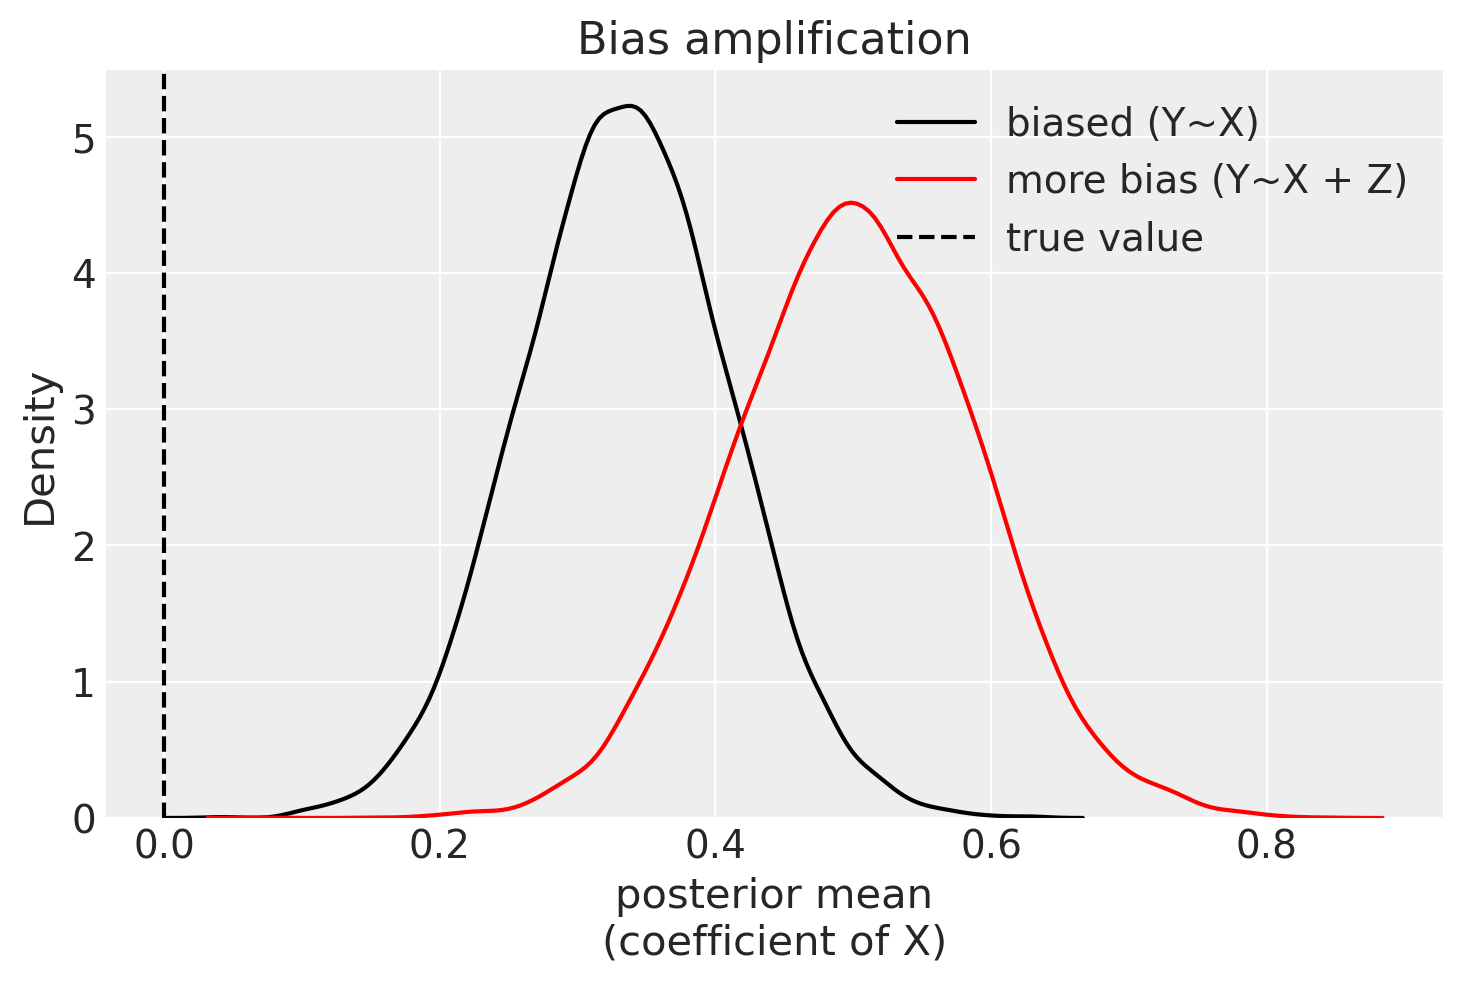

In [18]:
f, ax0 = plt.subplots()
sns.kdeplot(bX_coefs, color="k", label="biased (Y~X)", ax=ax0)
sns.kdeplot(bXZ_coefs, color="r", label="more bias (Y~X + Z)", ax=ax0)
ax0.axvline(x=0, color="black", linestyle="dashed", label="true value")
ax0.set(xlabel="posterior mean\n(coefficient of X)", title="Bias amplification")
ax0.legend()

In [19]:
%watermark -n -u -v -iv -w -p aesara,aeppl,xarray

Last updated: Wed Dec 14 2022

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.4.0

aesara: 2.8.2
aeppl : 0.0.35
xarray: 2022.6.0

arviz      : 0.12.1
seaborn    : 0.12.1
sys        : 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:43:44) [Clang 13.0.1 ]
pandas     : 1.4.3
statsmodels: 0.13.5
scipy      : 1.9.0
matplotlib : 3.5.3
pymc       : 4.1.7
numpy      : 1.23.2

Watermark: 2.3.1

